# Problema 17, 19, 21

## 17)

Queremos conocer el valor de $f'(x=2)$, con $f(x) = x \cdot e^x$, vía el método de extrapolación de Richardson, con un paso inicial de $h=0.4$. <br>
Analíticamente sabemos que <br>
<center> $f'(x) = e^x \cdot (x+1)$ </center> <br>
<center> $f'(x = 2) = 3 \cdot e^2 \approx 22.16717$ </center> <br>
Grafiquemos a $f(x)$ y la recta tangente en $x=2$ dada por la expansión de Taylor a 1º orden: <br>
<center> $T(x) = 2e^2 + 3e^2 \cdot (x-2)$ </center> <br>

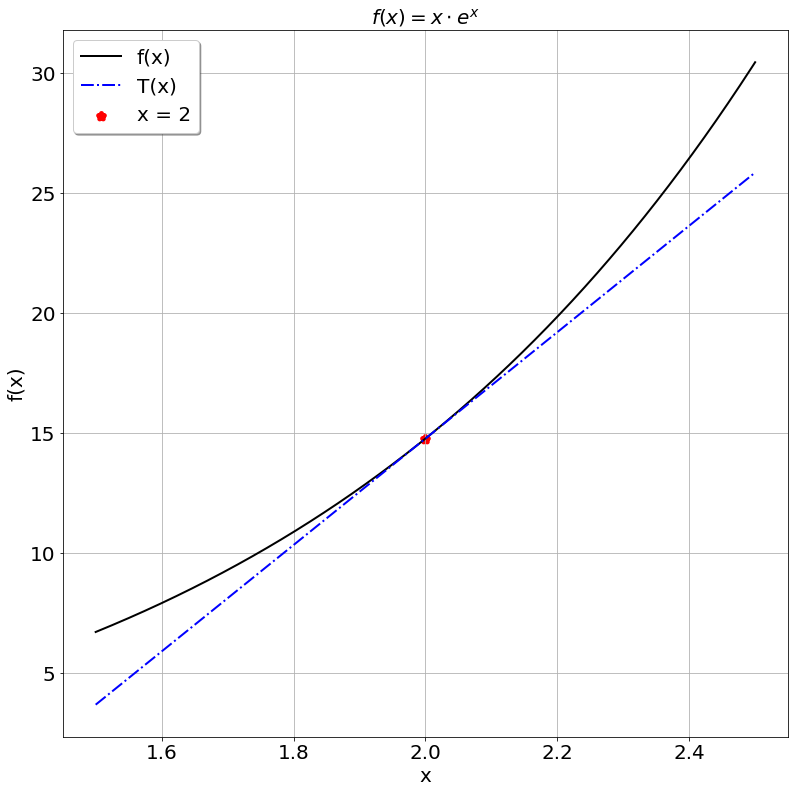

In [2]:
#f(x) = x*e^x; f'(x) = e^x(1+x); x0 = 2

import matplotlib.pyplot as plt
import numpy as np

x0 = 2
x = np.linspace(1.5,2.5,1000)
y = x*np.exp(x) #f(x)
z = np.exp(x0)*(1+x0)*(x-2)+(2*np.exp(x0)) #recta tg a f(x) en x = x0 (Exp en Taylor a 1º orden)

plt.figure(figsize=(13,13))
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.plot(x,z,color='b',lw=2,label='T(x)',ls='-.')
plt.scatter(2,x0*np.exp(x0),color='r',marker='*',lw=5,label='x = 2')
plt.title('$f(x)=x \cdot e^x$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [2]:
#Luego, quiero encontrar el valor f'(x0)
d = np.exp(x0)*(1+x0) #valor al que queremos llegar
print(f"Valor analítico de f'(2) = {d}")

Valor analítico de f'(2) = 22.16716829679195


Apliquemos Richardson, y veamos cómo va convergiendo el método:

In [3]:
#El método de Richardson consta de tomar 3 pts separados por un step h_i, repetir para un h_j = h_i/2 e ir restándolos para converger a una solución:

def f(x):
    y = x*np.exp(x)
    return y

D = np.zeros([10,10]) #matriz de pasos x orden: fila j => h/(2^j); columna i => operador D_i 

e = 1 #error (value default)
E = [] #Para guardar errores...
h = 0.4 #step inicial
x0 = 2 #punto donde quiero saber la derivada

D[0,0] = (f(x0+h) - f(x0-h))/(2*h) #1º elemento de la matriz
print('h=',h,'\nD_00=',D[0,0])
j = 0 #contador

while e > 10**-6 and j < 10: #pedimos un error de 10^-6
    
    j += 1 #contar
    
    h = h/2 #el loop lo comenzamos desde la 2º fila
    print('h=',h)
    
    D[j,0] = (f(x0+h) - f(x0-h))/(2*h) #1º D de cada fila
    print('D_',j,'0',D[j,0])
    
    for i in range(1,j+1): #recursividad para columnas 2,...,j
            
        D[j,i] = ((2**(2*i))*D[j,i-1] - D[j-1,i-1])/(2**(2*i) - 1)
        print('D_',j,i,'=',D[j,i])
            
        e = abs(D[j,i]-D[j,i-1]) #el error es la dif entre D sucesivos dado el paso h_j
        
    print('error = ',e)
    E.append(e)

print("\nEl valor de f'(x0) es =",D[j,j],'con un error =',e)

h= 0.4 
D_00= 23.16346429313457
h= 0.2
D_ 1 0 22.414160657029417
D_ 1 1 = 22.1643927783277
error =  0.2497678787017179
h= 0.1
D_ 2 0 22.22878688030728
D_ 2 1 = 22.166995621399902
D_ 2 2 = 22.167169144271384
error =  0.0001735228714814241
h= 0.05
D_ 3 0 22.18256485779758
D_ 3 1 = 22.167157516961012
D_ 3 2 = 22.16716830999842
D_ 3 3 = 22.167168296755992
error =  1.3242427598925133e-08

El valor de f'(x0) es = 22.167168296755992 con un error = 1.3242427598925133e-08


Analicemos la convergencia del error:

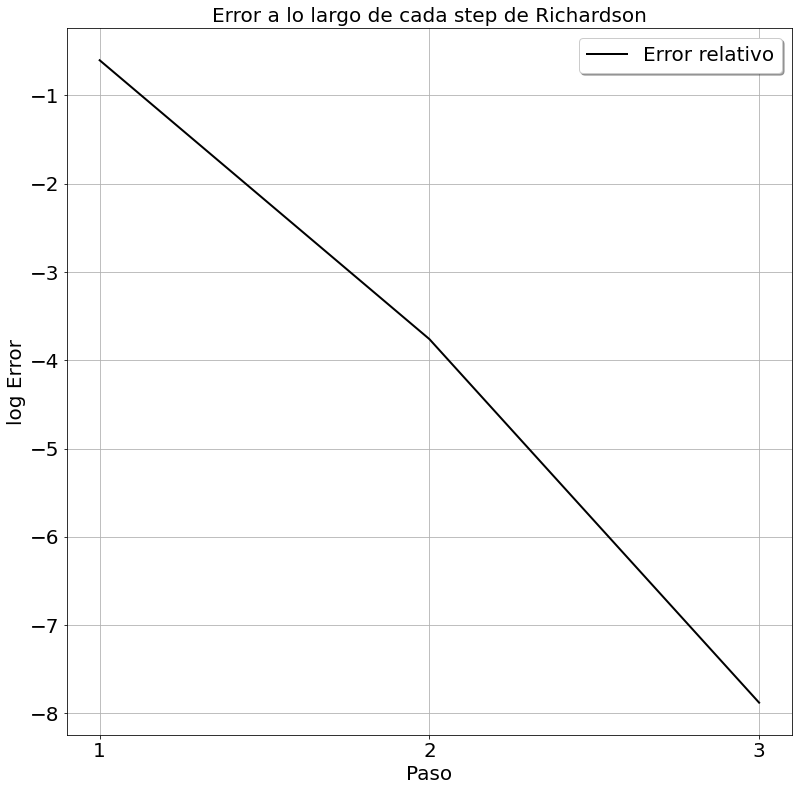

In [4]:
plt.figure(figsize=(13,13))
plt.plot([i for i in range(1,len(E)+1)],np.log10(E),color='k',lw=2,label='Error relativo')
plt.title('Error a lo largo de cada step de Richardson',size=20)
plt.grid(True)
plt.xlabel('Paso',size=20)
plt.ylabel('log Error',size=20)
plt.xticks([i for i in range(1,len(E)+1)],size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

## 19)

Analizaremos el comportamiento de los distintos tipos de polinomios interpolatorios para las funciones <br>
#### <center> $e^{-3x}$ y $\frac{1}{1+x^2}$ </center>
Comencemos viendo cómo es cada tipo de polinomio comparado con la función elegida y luego grafiquemos el error de cada uno. <br>
**Spline lineal:** <br>
*Polinomio de Lagrange de grado 1. Unimos los puntos a interpolar con rectas, por lo que debemos dar $x_i$ y $f(x_i)$*.

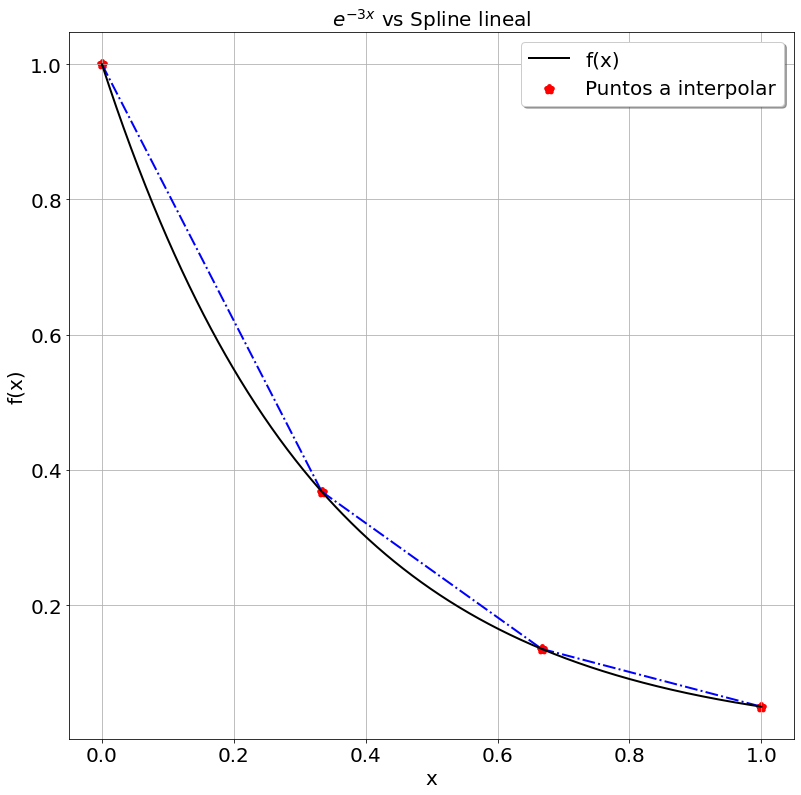

In [10]:
#Los puntos que me dan son:

N = 1 #orden de los polinomios
n = 4 #pts me dan
X = [0,1/3,2/3,1] # lista de valores en x.
Y = [] # lista de f(x) calculados.

for i in range(n):
    b = np.exp(-3*X[i]) #calculo f(x)
    Y.append(b) #armo la lista de y

#Quiero aplicar esto a trozos...

#escribamos el polinomio de grado n-1, p:

def p(x,X,Y,N=N):
    
    p = 0 #variable para la sumatoria
        
    for j in range(N+1): #sumatoria desde j hasta n-1
        
        l = 1 #variable para la productoria, adentro del loop de la sumatoria
        
        for i in range(N+1): #productoria para el l(x)
            
            if i == j: #en la productoria no entra el término i = j
                continue
            else:
                l = l*((x-X[i])/(X[j]-X[i])) #tengo que definir la lista de pts X y su f(x), Y.
                
            #print(l) revisamos cada término de l
                
        p += l*Y[j] #usando lista y el polinomio l_j, voy armando el polinomio p con n pts. 
        
    return p

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
x = np.linspace(X[0],X[3],1000)
y1 = p(x1,X[:2],Y[:2]) #el polinomio creado
y2 = p(x2,X[1:3],Y[1:3])
y3 = p(x3,X[2:4],Y[2:4])
z = np.exp(-3*x) #función dada

plt.figure(figsize=(13,13))
plt.plot(x1,y1,color='b',lw=2,ls='-.')
plt.plot(x2,y2,color='b',lw=2,ls='-.')
plt.plot(x3,y3,color='b',lw=2,ls='-.')
plt.plot(x,z,color='k',lw=2,label='f(x)')
plt.scatter(X,Y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$e^{-3x}$ vs Spline lineal',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [11]:
#Veamos el error (lo dejamos guardado para después)

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
z1 = np.exp(-3*x1)
z2 = np.exp(-3*x2)
z3 = np.exp(-3*x3)

E1_1lin = -(z1-y1) #dif entre f(x) y el p(x) que mejor la ajusta a 2º orden
E2_1lin = -(z2-y2)
E3_1lin = -(z3-y3)

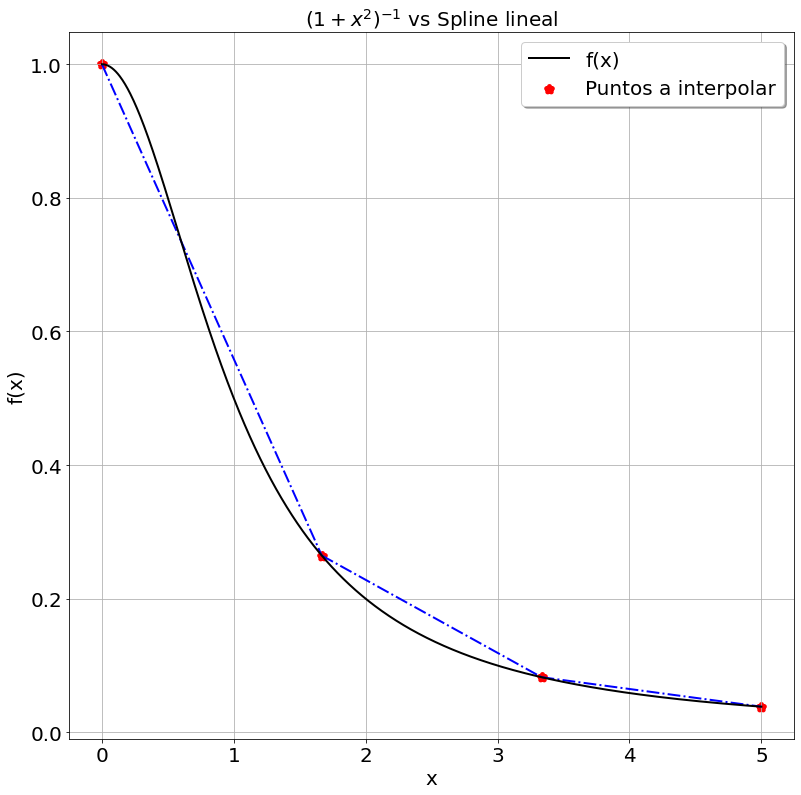

In [12]:
#Repetimos procedimiento para (1+x^2)^-1:

N = 1 #orden de los polinomios
n = 4 #pts me dan
X = [0,5/3,10/3,5] # lista de valores en x.
Y = [] # lista de f(x) calculados.

for i in range(n):
    b = 1/(1+X[i]**2) #calculo f(x)
    Y.append(b) #armo la lista de y
    
x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
x = np.linspace(X[0],X[3],1000)
y1 = p(x1,X[:2],Y[:2]) #el polinomio creado
y2 = p(x2,X[1:3],Y[1:3])
y3 = p(x3,X[2:4],Y[2:4])
y = 1/(1+x**2) #función dada

plt.figure(figsize=(13,13))
plt.plot(x1,y1,color='b',lw=2,ls='-.')
plt.plot(x2,y2,color='b',lw=2,ls='-.')
plt.plot(x3,y3,color='b',lw=2,ls='-.')
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter(X,Y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$(1+x^2)^{-1}$ vs Spline lineal',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [13]:
#Veamos el error:

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
z1 = 1/(1+x1**2)
z2 = 1/(1+x2**2)
z3 = 1/(1+x3**2)

E1_2lin = -(z1-y1) #dif entre f(x) y el p(x) que mejor la ajusta a 2º orden
E2_2lin = -(z2-y2)
E3_2lin = -(z3-y3)

**Spline de Hermite:** <br>
*Debemos no sólo saber $f(x_i)$, si no que también tenemos que calcular $f'(x_i)$. Luego* <br>
#### <center> $(e^{-3x})' = -3e^{-3x}$ <br> <br> $(\frac{1}{1+x^2})' = \frac{-2x}{(1+x^2)^2}$ </center>
Evaluamos para los $x_i$ dados en cada caso y obtenemos:

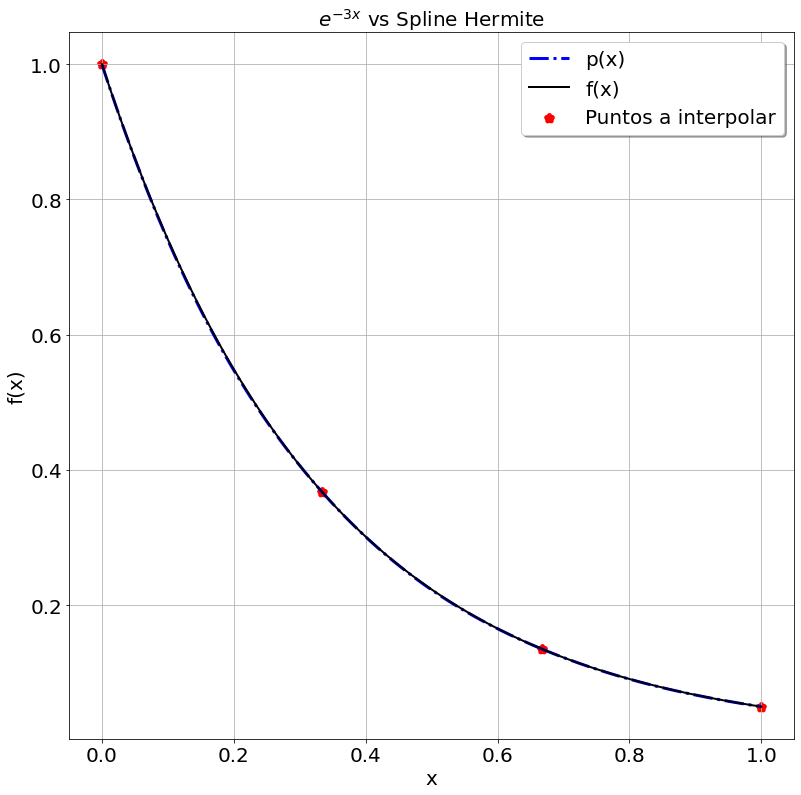

In [14]:
#Forma del polinomio interpolatorio de Hermite de grado 3 (necesito 2 pts (x,y), y el valor de las derivadas en ese punto).
#Lo quiero definir de a trozos, al igual que antes, compartiendo los pts intermedios.

def h(x,X,Y,D):
    p1 = (((3*X[0]-2*x-X[1])*(x-X[1])**2)/(X[0]-X[1])**3)*Y[0] + (((3*X[1]-2*x-X[0])*(x-X[0])**2)/(X[1]-X[0])**3)*Y[1] 
    p2 = (((x-X[0])*(x-X[1])**2)/((X[0]-X[1])**2))*D[0] + (((x-X[1])*(x-X[0])**2)/((X[1]-X[0])**2))*D[1]
    h = p1 + p2
    return h

X = np.array([0,1/3,2/3,1])
Y = np.exp(-3*X)
D = -3*Y

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
x = np.linspace(X[0],X[3],1000)
y1 = h(x1,X[:2],Y[:2],D[:2]) #el polinomio creado
y2 = h(x2,X[1:3],Y[1:3],D[1:3])
y3 = h(x3,X[2:4],Y[2:4],D[2:4])
y = np.exp(-3*x) #función dada

plt.figure(figsize=(13,13))
plt.plot(x1,y1,color='b',lw=3,ls='-.')
plt.plot(x2,y2,color='b',lw=3,ls='-.')
plt.plot(x3,y3,color='b',lw=3,ls='-.',label='p(x)')
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter(X,Y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$e^{-3x}$ vs Spline Hermite',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [15]:
#Veamos el error

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
z1 = np.exp(-3*x1)
z2 = np.exp(-3*x2)
z3 = np.exp(-3*x3)

E1_1H = -(z1-y1) #dif entre f(x) y el p(x) que mejor la ajusta a 2º orden
E2_1H = -(z2-y2)
E3_1H = -(z3-y3)

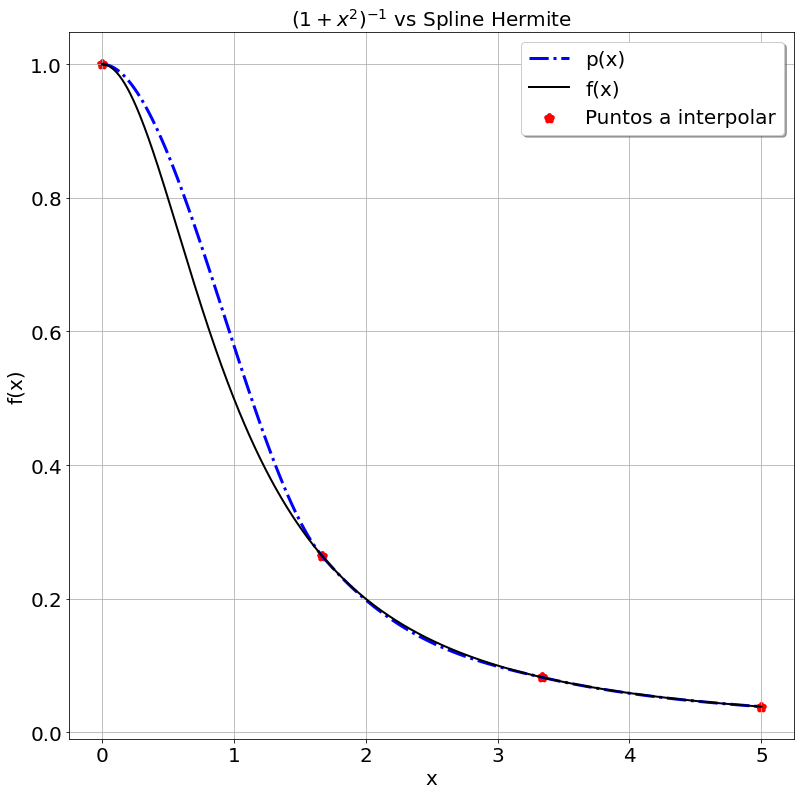

In [16]:
#Repito para la otra func:

X = np.array([0,5/3,10/3,5])
Y = 1/(1+X**2)
D = -2*X/((1+X**2)**2)

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
x = np.linspace(X[0],X[3],1000)
y1 = h(x1,X[:2],Y[:2],D[:2]) #el polinomio creado
y2 = h(x2,X[1:3],Y[1:3],D[1:3])
y3 = h(x3,X[2:4],Y[2:4],D[2:4])
y = 1/(1+x**2) #función dada

plt.figure(figsize=(13,13))
plt.plot(x1,y1,color='b',lw=3,ls='-.')
plt.plot(x2,y2,color='b',lw=3,ls='-.')
plt.plot(x3,y3,color='b',lw=3,ls='-.',label='p(x)')
plt.plot(x,y,color='k',lw=2,label='f(x)')
plt.scatter(X,Y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$(1+x^2)^{-1}$ vs Spline Hermite',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [17]:
#Veamos el error

x1 = np.linspace(X[0], X[1], 100) #dominio
x2 = np.linspace(X[1], X[2], 100)
x3 = np.linspace(X[2], X[3], 100)
z1 = 1/(1+x1**2)
z2 = 1/(1+x2**2)
z3 = 1/(1+x3**2)

E1_2H = -(z1-y1) #dif entre f(x) y el p(x) que mejor la ajusta a 2º orden
E2_2H = -(z2-y2)
E3_2H = -(z3-y3)

**Splines cúbicos (*clamped* y *natural*):** <br>
*Usamos el código que debíamos escribir para el Problema 21 (rompemos causalidad por un momento, perdón Minkowski).* <br>
*De paso, probemos en hacer un código dónde podamos elegir cuál de los 2 métodos quiero, recordando que si uso "clamped", debo conocer las derivadas en los extremos del dominio.*

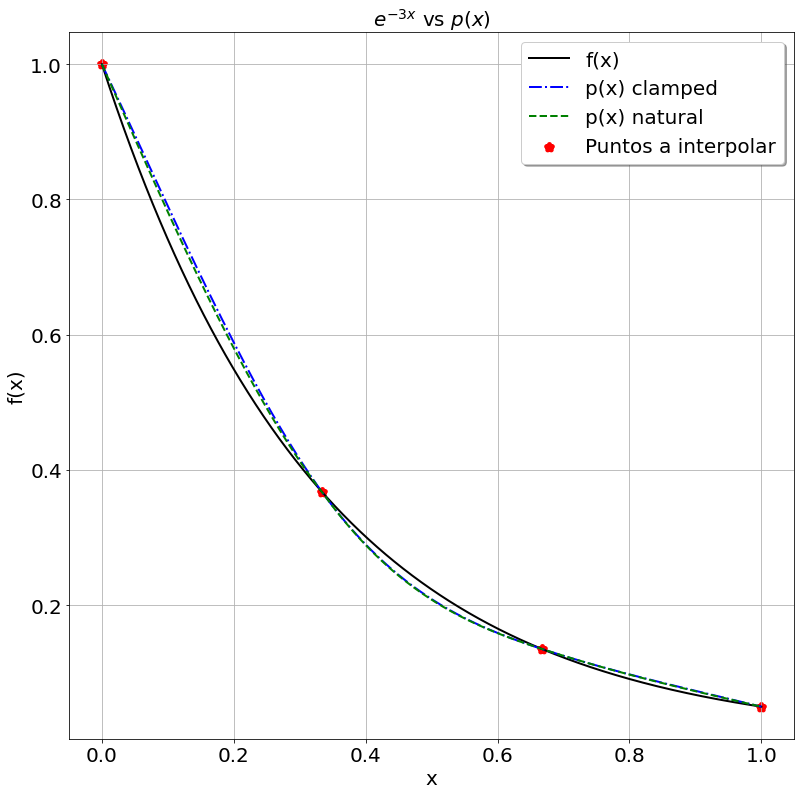

In [18]:
n = 4 #cant de puntos conocidos
x = 0, 1/3, 2/3, 1 #dom
x = np.array(x)
y = np.exp(-3*x) #imagen
D = -3*y #Derivadas

def tridiag(n=n,x=x,y=y,mod="natural",D=D):

    h = np.empty(n-1) #n-1 intervalos

    for i in range(n-1):
        h[i] = x[i+1] - x[i] #defino mis intervalos, en este caso todos iguales

    #De la matriz 3-diag:

    a = np.empty(n) #sub-diag
    b = np.empty(n) #main-diag
    c = np.empty(n) #supra-diag

    a[0] = 0 #no existe
    c[n-1] = 0 #'' ''
    
    if mod == "natural":

        b[0] = 1 #Nat
        b[n-1] = 1 #Nat
        
    else:

        b[0] = 2*h[0] #Clamped
        b[n-1] = 2*h[n-2] #Clamped

    for i in range(n-1):
        c[i] = h[i]
    for i in range(1,n):
        a[i] = h[i-1]
    for i in range(1,n-1):
        b[i] = 2*(a[i] + c[i])

    r = np.empty(n) #r_i : inhomogeneidades de A * p'' = r

    if mod == "natural":
    
        r[0] = 0 #Nat
        r[n-1] = 0 #Nat
        
    else:

        r[0] = (1/h[0])*(y[1]-y[0]) - D[0] #Clamped 
        r[n-1] = D[-1] - (1/h[n-2])*(y[n-1]-y[n-2]) #Clamped

    for i in range(1,n-1):
        r[i] = 6* ((1/h[i])*(y[i+1] - y[i]) - (1/h[i-1])*(y[i] - y[i-1]))

    #A la 2-diag:

    B = np.empty(n) #main-diag
    R = np.empty(n) #supra-diag

    B[0] = b[0]
    R[0] = r[0]

    for i in range(1,n):
        B[i] = b[i] - (a[i]*c[i-1])/B[i-1] 
    for i in range(1,n):
        R[i] = r[i] - (a[i]*R[i-1])/B[i-1]

    P = np.empty(n) #p''_i : incógnitas
    
    if mod == "natural":

        P[n-1] = 0 #Nat
        P[0] = 0 #Nat
        m = n-2 #Para el rango de loop backward
        
    else:
        
        P[n-1] = R[n-1]/B[n-1] #últ lugar; Clamped
        m = n-1

    
    for i in range(m): #llega hasta el n-3 si es nat #range(n-1) para clamped
        P[n-2-i] = (1/B[n-2-i])*(R[n-2-i] - c[n-2-i]*P[n-i-1]) #backwards (desde el penúltimo) (i comienza = 0).

    #Armamos los (n-1) polinomios p_i(x):

    def p(t):
        if 0 <= t < x[1]:
            i = 0
        elif x[1] <= t < x[2]:
            i = 1
        else:
            i = 2

        p = ((P[i+1] - P[i])/(6*h[i]))*(t-x[i])**3 + 0.5*P[i]*(t-x[i])**2 + ((y[i+1]-y[i])/h[i] - h[i]*P[i+1]/6 - h[i]*P[i]/3)*(t-x[i]) + y[i]
        return p
    
    vfunc = np.vectorize(p)
    
    return vfunc

t = np.linspace(0, 1, 1000)
w = np.exp(-3*t) #(t,w,z) variables usadas porque no puedo usar (x,y) dado a que definen mi función (datos).
z1 = tridiag(mod="clamped")(t)
z2 = tridiag(mod="natural")(t)

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,label='f(x)')
plt.plot(t,z1,color='b',lw=2,ls='-.',label='p(x) clamped')
plt.plot(t,z2,color='g',lw=2,ls='--',label='p(x) natural')
plt.scatter([0,1/3,2/3,1],np.exp(-3*np.array([0,1/3,2/3,1])),marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$e^{-3x}$ vs $p(x)$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [19]:
#Veamos el error:

E_1CN = (z2-w)
E_1CC = (z1-w)

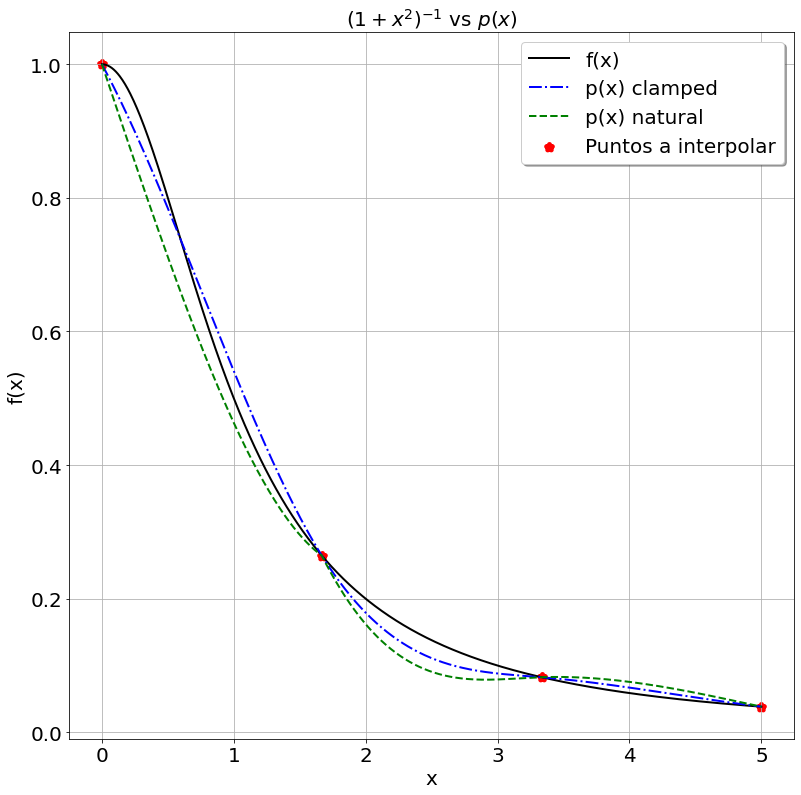

In [20]:
#Paso a la otra func

n = 4 #cant de puntos conocidos
x = 0, 5/3, 10/3, 5 #dom
x = np.array(x)
y = 1/(1+x**2) #imagen
D = -2*x/((1+x**2)**2) #Derivadas

t = np.linspace(0, 5, 1000)
w = 1/(1+t**2) #función dada #(t,w,z) variables usadas porque no puedo usar (x,y) dado a que definen mi función (datos).
z1 = tridiag(x=x,y=y,D=D,mod="clamped")(t)
z2 = tridiag(x=x,y=y,D=D,mod="natural")(t)

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,label='f(x)')
plt.plot(t,z1,color='b',lw=2,ls='-.',label='p(x) clamped')
plt.plot(t,z2,color='g',lw=2,ls='--',label='p(x) natural')
plt.scatter(x,y,marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$(1+x^2)^{-1}$ vs $p(x)$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

In [21]:
#Veamos el error:

E_2CN = (z2-w)
E_2CC = (z1-w)

Entonces, ahora si, comparemos los errores de cada método para cada función: <br>
Para $f(x) = e^{-3x}$:

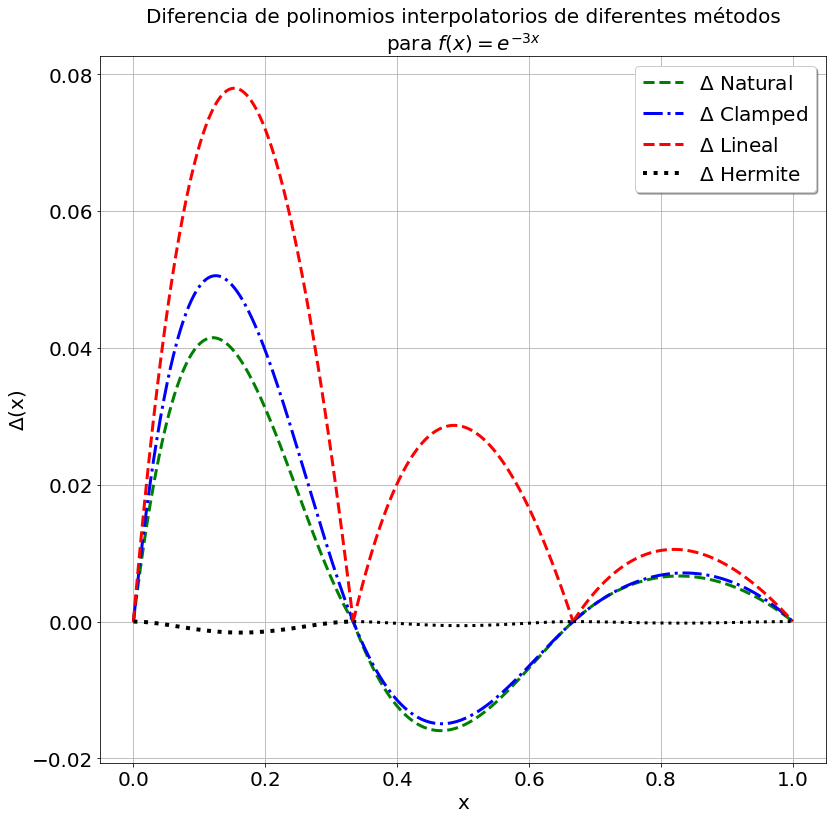

In [25]:
#e^-3x:

plt.figure(figsize=(13,13))

t = np.linspace(0, 1, 1000)
w = np.exp(-3*t)
x1 = np.linspace(0, 1/3, 100) #dominio
x2 = np.linspace(1/3, 2/3, 100)
x3 = np.linspace(2/3, 1, 100)

plt.plot(t,E_1CN,color='g',label='$\Delta$ Natural',lw=3,ls='--')
plt.plot(t,E_1CC,color='b',label='$\Delta$ Clamped',lw=3,ls='-.')
plt.plot(x1,E1_1lin,color='r',label='$\Delta$ Lineal',lw=3,ls='--')
plt.plot(x2,E2_1lin,color='r',lw=3,ls='--')
plt.plot(x3,E3_1lin,color='r',lw=3,ls='--')
plt.plot(x1,E1_1H,color='k',label='$\Delta$ Hermite',lw=4,ls=':')
plt.plot(x2,E2_1H,color='k',lw=3,ls=':')
plt.plot(x3,E3_1H,color='k',lw=3,ls=':')

plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta$(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Diferencia de polinomios interpolatorios de diferentes métodos\npara $f(x)=e^{-3x}$',size=20)
plt.legend(fontsize=20,shadow=True);

Y para $f(x)=\frac{1}{1+x^2}$:

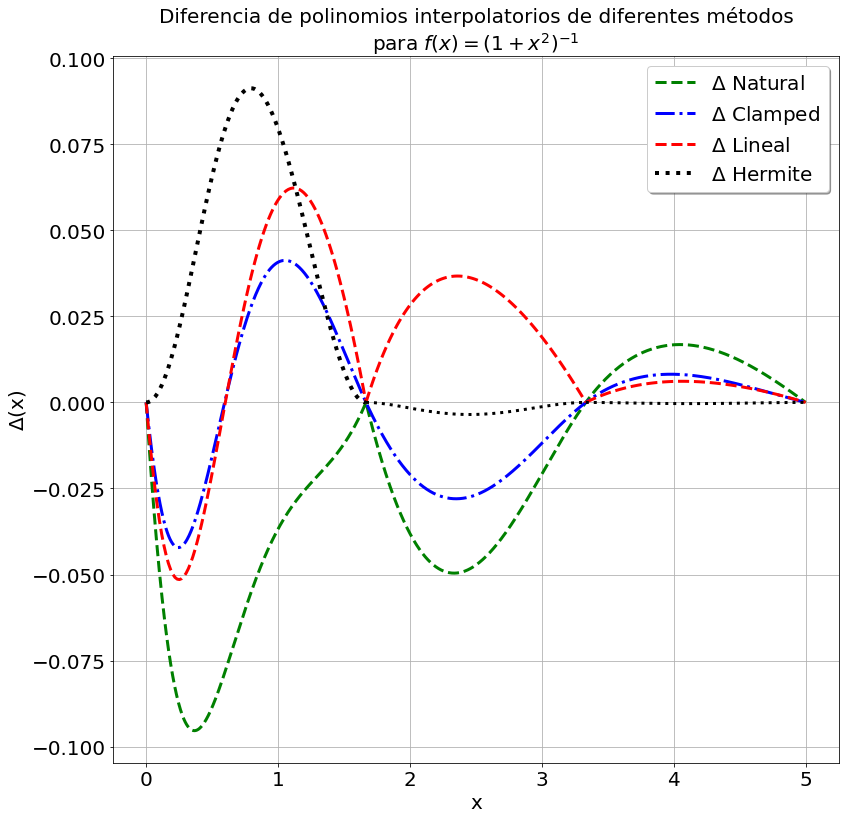

In [26]:
#(1+x^2)^-1:

plt.figure(figsize=(13,13))

t = np.linspace(0, 5, 1000)
w = 1/(1+t**2)
x1 = np.linspace(0, 5/3, 100) #dominio
x2 = np.linspace(5/3, 10/3, 100)
x3 = np.linspace(10/3, 5, 100)

plt.plot(t,E_2CN,color='g',label='$\Delta$ Natural',lw=3,ls='--')
plt.plot(t,E_2CC,color='b',label='$\Delta$ Clamped',lw=3,ls='-.')
plt.plot(x1,E1_2lin,color='r',label='$\Delta$ Lineal',lw=3,ls='--')
plt.plot(x2,E2_2lin,color='r',lw=3,ls='--')
plt.plot(x3,E3_2lin,color='r',lw=3,ls='--')
plt.plot(x1,E1_2H,color='k',label='$\Delta$ Hermite',lw=4,ls=':')
plt.plot(x2,E2_2H,color='k',lw=3,ls=':')
plt.plot(x3,E3_2H,color='k',lw=3,ls=':')

plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta$(x)',size=20)
plt.title('Diferencia de polinomios interpolatorios de diferentes métodos\npara $f(x)=(1+x^2)^{-1}$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

Sólo a modo de curiosidad, comparemos en este último caso la suma del cuadrado de diferentes métodos:

In [27]:
#Para ver no más:

print(f'La suma del error cuadrado para el Polinomio de Hermite es = {sum(E1_2H**2)+sum(E2_2H**2)+sum(E3_2H**2)}')
print(f'La suma del error cuadrado para el Spline Clamped es = {sum(E_2CC**2)}')
print(f'La suma del error cuadrado para el Spline Natural es = {sum(E_2CN**2)}')

La suma del error cuadrado para el Polinomio de Hermite es = 0.3178310934155646
La suma del error cuadrado para el Spline Clamped es = 0.42368971251788523
La suma del error cuadrado para el Spline Natural es = 1.5194401389262067


Por lo que, si bien se separa bastante al comienzo, el polinomio de Hermite sigue siendo el mejor ajuste global (como en el caso anterior, donde esto se podía apreciar gráficamente).

## 21)

### *Disclaimer: Este código es el que hicimos 1º, y luego lo aplicamos al problema 19) de manera correspondiente. Por ende, dejamos lo realizado para este problema, si bien es **lo mismo** que lo mostrado en el Problema 19).*

Apliquemos el código para resolver un sistema de ecuaciones lineales que formen una matriz tridiagonal a las funciones del Problema 19 <br>
#### <center> $e^{-3x}$ y $\frac{1}{1+x^2}$ </center>
Comenzamos con $e^{-3x}$:

In [5]:
#f(x) = e^-3x; x_i = 0, 1/3, 2/3, 1

n = 4 #cant de puntos conocidos
x = 0, 1/3, 2/3, 1 #dom
x = np.array(x)
y = np.exp(-3*x) #imagen

def tridiag(n=n,x=x,y=y):

    h = np.empty(n-1) #n-1 intervalos

    for i in range(n-1):
        h[i] = x[i+1] - x[i] #defino mis intervalos, en este caso todos iguales

    #De la matriz 3-diag:

    a = np.empty(n) #sub-diag
    b = np.empty(n) #main-diag
    c = np.empty(n) #supra-diag

    a[0] = 0 #no existe
    c[n-1] = 0 #'' ''

    b[0] = 1 #Nat
    b[n-1] = 1 #Nat

    #b[0] = 2*h[0] #Clamped
    #b[n-1] = 2*h[n-1] #Clamped

    for i in range(n-1):
        c[i] = h[i]
    for i in range(1,n):
        a[i] = h[i-1]
    for i in range(1,n-1):
        b[i] = 2*(a[i] + c[i])

    r = np.empty(n) #r_i : inhomogeneidades de A * p'' = r

    r[0] = 0 #Nat
    r[n-1] = 0 #Nat

    #r[0] = (1/h[0])*(y[1]-y[0]) - p'_1 #Clamped 
    #r[n-1] = p'_n-1 - (1/h[n-2])*(y[n-1]-y[n-2]) #Clamped

    for i in range(1,n-1):
        r[i] = 6* ((1/h[i])*(y[i+1] - y[i]) - (1/h[i-1])*(y[i] - y[i-1]))

    #A la 2-diag:

    B = np.empty(n) #main-diag
    R = np.empty(n) #supra-diag

    B[0] = b[0]
    R[0] = r[0]

    for i in range(1,n):
        B[i] = b[i] - (a[i]*c[i-1])/B[i-1] 
    for i in range(1,n):
        R[i] = r[i] - (a[i]*R[i-1])/B[i-1]

    P = np.empty(n) #p''_i : incógnitas

    P[n-1] = 0 #Nat
    #P[n-1] = R[n-1]/B[n-1] #últ lugar; Clamped
    P[0] = 0 #Nat

    for i in range(n-2): #llega hasta el n-3 si es nat #range(n-1) para clamped
        P[n-2-i] = (1/B[n-2-i])*(R[n-2-i] - c[n-2-i]*P[n-i-1]) #backwards (desde el penúltimo) (i comienza = 0).

    #Armamos los (n-1) polinomios p_i(x):

    def p(t):
        if 0 <= t < x[1]:
            i = 0
        elif x[1] <= t < x[2]:
            i = 1
        else:
            i = 2

        p = ((P[i+1] - P[i])/(6*h[i]))*(t-x[i])**3 + 0.5*P[i]*(t-x[i])**2 + ((y[i+1]-y[i])/h[i] - h[i]*P[i+1]/6 - h[i]*P[i]/3)*(t-x[i]) + y[i]
        return p
    
    global vfunc
    vfunc = np.vectorize(p)
    
    return

In [6]:
tridiag()

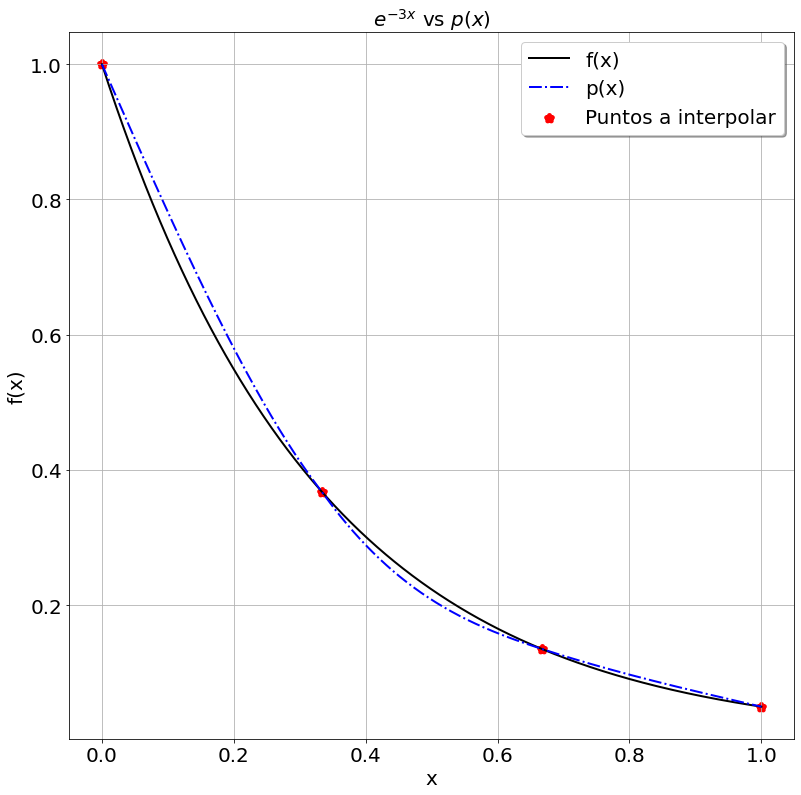

In [7]:
t = np.linspace(0, 1, 1000)
w = np.exp(-3*t) #(t,w,z) variables usadas porque no puedo usar (x,y) dado a que definen mi función (datos).
z = vfunc(t)

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,label='f(x)')
plt.plot(t,z,color='b',lw=2,ls='-.',label='p(x)')
plt.scatter([0,1/3,2/3,1],np.exp(-3*np.array([0,1/3,2/3,1])),marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$e^{-3x}$ vs $p(x)$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);

Repetimos el proceso para $\frac{1}{1+x^2}$:

In [8]:
#f(x) = (1+x^2)^-1; x_i = 0, 5/3, 10/3, 5

n = 4 #cant de puntos conocidos
x = 0, 5/3, 10/3, 5 #dom
x = np.array(x)
y = 1/(1+x**2) #imagen

tridiag(x=x,y=y)

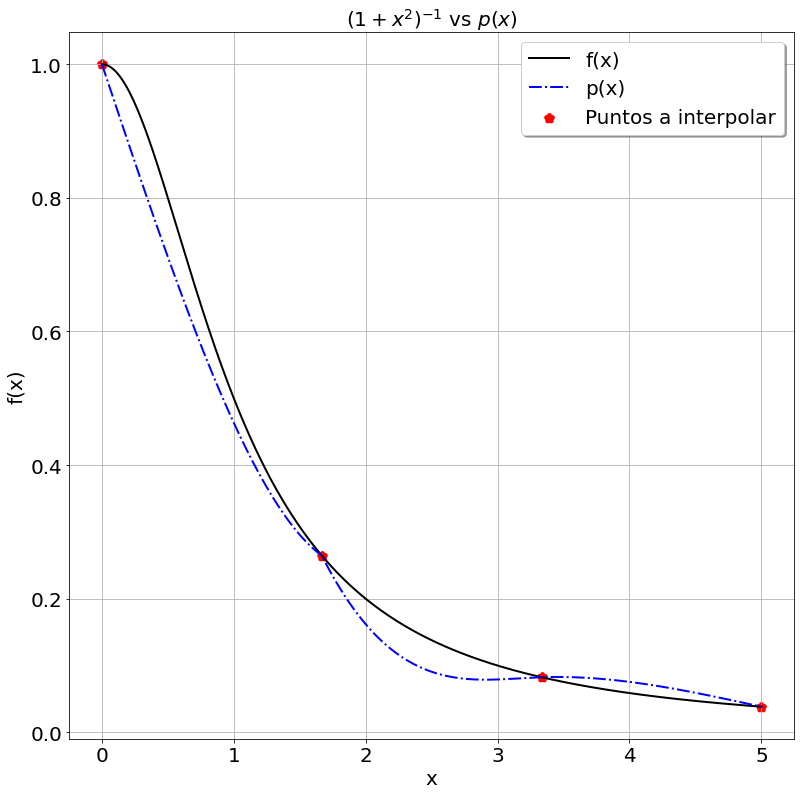

In [9]:
t = np.linspace(0, 5, 1000)
w = 1/(1+t**2) #(t,w,z) variables usadas porque no puedo usar (x,y) dado a que definen mi función (datos).
z = vfunc(t)

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,label='f(x)')
plt.plot(t,z,color='b',lw=2,ls='-.',label='p(x)')
plt.scatter(x,1/(1+x**2),marker='*',color='r',lw=5,label='Puntos a interpolar')
plt.title('$(1+x^2)^{-1}$ vs $p(x)$',size=20)
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('f(x)',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20,shadow=True);